# Conditional distributions

Conditioning is a way to reduce the dimensionnality of a multivariate distribution. It allows to plot the d

In [1]:
import openturns as ot
import numpy as np
import otbenchmark as otb
import openturns.viewer as otv
import pylab as pl

## Conditional distribution of a three dimensional gaussian distribution

The random variable is (X0, X1, X2).

In [2]:
distribution = ot.Normal(3)

We condition with respect to X1=mu1, i.e. we consider (X0, X1, X2) | X1=2. 

In [3]:
conditionalIndices = [1]
conditionalReferencePoint = [2.0]
conditionalDistribution = ot.Distribution(
    otb.ConditionalDistribution(
        distribution, conditionalIndices, conditionalReferencePoint
    )
)

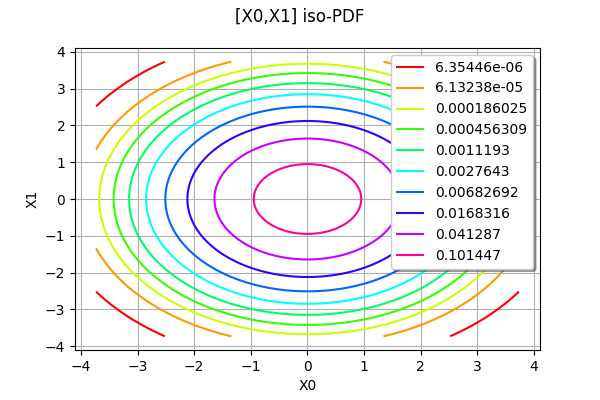

In [4]:
conditionalDistribution.drawPDF()

## Conditional distribution of a three dimensional mixture

In [5]:
# Create a Funky distribution
corr = ot.CorrelationMatrix(3)
corr[0, 1] = 0.2
copula = ot.NormalCopula(corr)
x1 = ot.Normal(-1.0, 1.0)
x2 = ot.Normal(2.0, 1.0)
x3 = ot.Normal(1.0, 1.0)
x_funk = ot.ComposedDistribution([x1, x2, x3], copula)

In [6]:
# Create a Punk distribution
x1 = ot.Normal(1.0, 1.0)
x2 = ot.Normal(-2, 1.0)
x3 = ot.Normal(2.0, 1.0)
x_punk = ot.ComposedDistribution([x1, x2, x3], copula)

In [7]:
distribution = ot.Mixture([x_funk, x_punk], [0.5, 1.0])

In [8]:
referencePoint = distribution.getMean()
referencePoint

class=Point name=Unnamed dimension=3 values=[0.333333,-0.666667,1.66667]

In [9]:
conditionalIndices = [1]
conditionalReferencePoint = [-0.5]
conditionalDistribution = ot.Distribution(
    otb.ConditionalDistribution(
        distribution, conditionalIndices, conditionalReferencePoint
    )
)

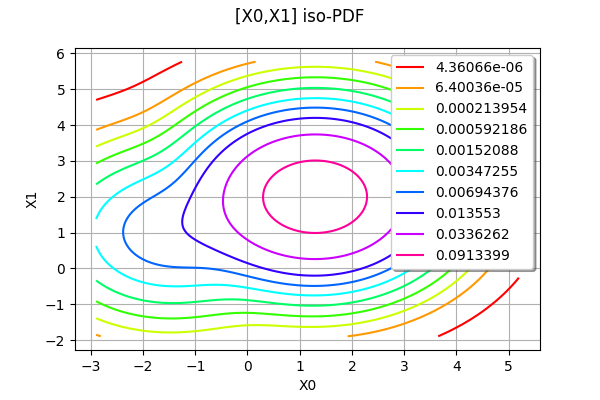

In [10]:
conditionalDistribution.drawPDF()